In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt

from wavenet import model, train, sample, audio, utils, viz

In [3]:
p, n_examples, n_samples = model.HParams(n_audio_chans=1), 2**13, 4
X = audio.load_dataset_from_track('data/steinway.wav', audio.HParams())
m = model.Wavenet(p)
t = train.Trainer(m, X, None, train.HParams(max_epochs=1, batch_size=1), None)

In [4]:
t.train()

1:12 loss 32.15226 lr 3.000000e-04:   0%|          | 13/4381 [01:54<10:40:18,  8.80s/it]


KeyboardInterrupt: 

In [12]:
track = sample.sample(m, 1000)

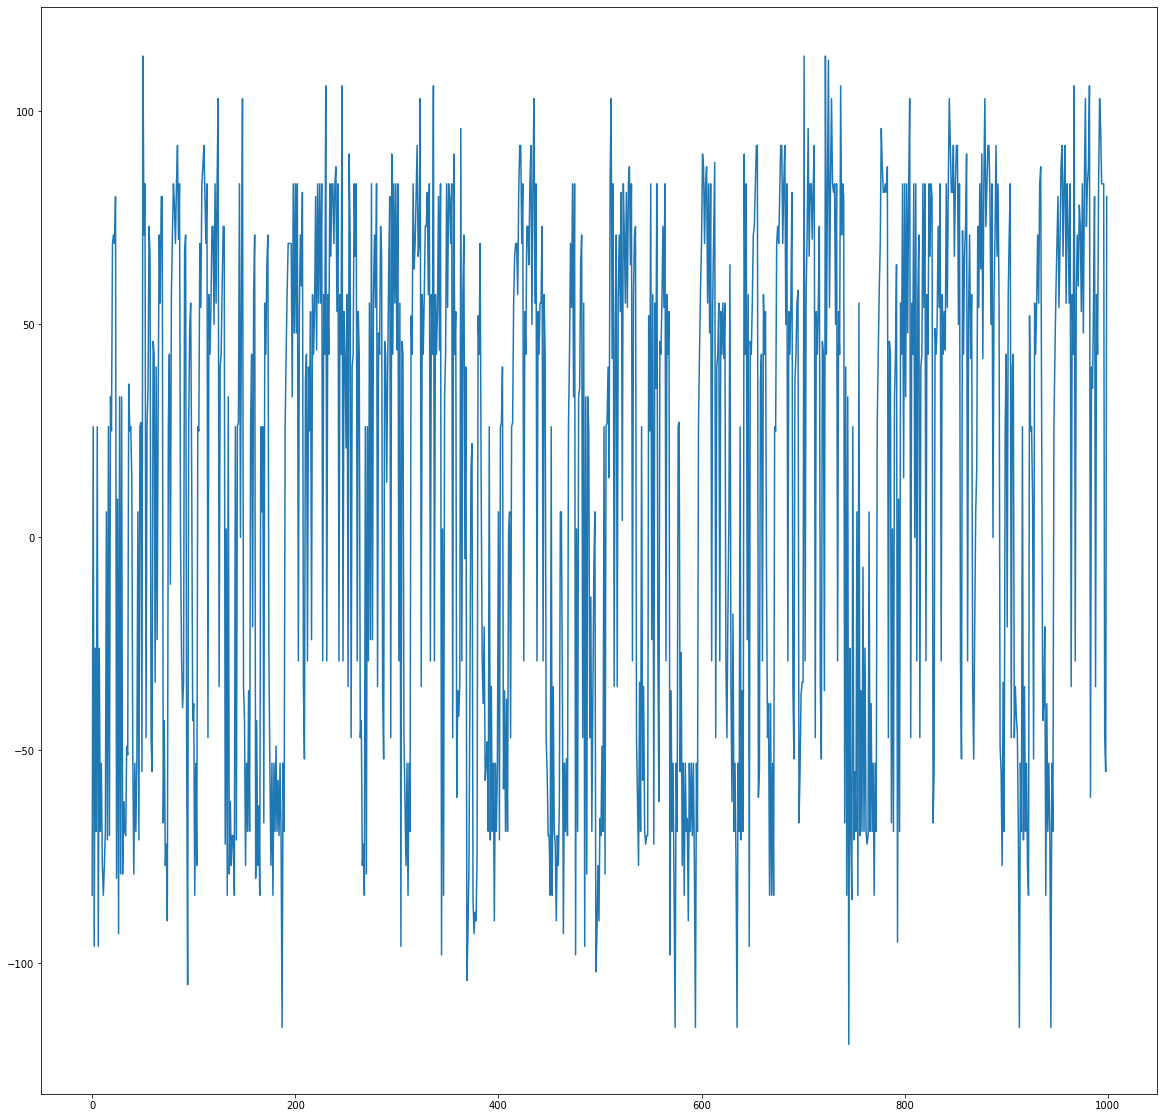

In [18]:
plt.figure(figsize=(20, 20))
plt.plot(track.squeeze())

In [19]:
import librosa

In [23]:
librosa.mu_expand(track.squeeze())

TypeError: any() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis


In [31]:
a = audio.load_dataset_from_track('data/steinway.wav', audio.HParams())

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([-105. ,  -83.6,  -62.2,  -40.8,  -19.4,    2. ,   23.4,   44.8,
          66.2,   87.6,  109. ], dtype=float32),
 <a list of 10000 BarContainer objects>)

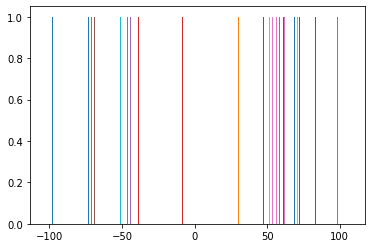

In [35]:
plt.hist(a.flatten()[:10000])